# **Bike Sharing Prediction**

### **Contents**
1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

***

### **Business Problem Understanding**

**Context**

Sistem *bike sharing* merupakan sarana persewaan sepeda dimana seluruh proses mulai dari keanggotaan, persewaan, dan pengembalian telah menjadi otomatis menggunakan sistem. Dengan menggunakan sistem ini, orang dapat menyewa sepeda dari satu lokasi dan mengembalikannya ke tempat lain sesuai kebutuhan. Saat ini, ada lebih dari 500 program *bike sharing* di seluruh dunia yang terdiri dari 500 ribu sepeda. Sistem *bike sharing* menghasilkan minat yang besar karena peran pentingnya dalam mengatasi masalah lalu lintas, lingkungan, dan kesehatan.

Data yang dihasilkan oleh sistem *bike sharing* ini menjadi menarik untuk diteliti dan dimanfaatkan lebih lanjut. Sistem *bike sharing* ini dapat menjadi semacam jaringan sensor yang berfungsi dalam membaca mobilitas di sebuah kota. Oleh karena itu, diharapkan peristiwa terpenting di kota dapat dideteksi dengan memantau data ini.

**Problem Statement**

Salah satu tantangan yang dihadapi oleh pemilik sistem *bike sharing* yaitu **memprediksi jumlah unit sepeda** yang akan disewa oleh pengguna pada waktu dan kondisi tertentu. 


**Goals**

Berdasarkan permasalahan tersebut, diperlukan sebuah **tool yang dapat memprediksi kebutuhan jumlah unit sepeda** pada waktu dan kondisi tertentu.


**Analytic Approach**

Data historis dari sistem *bike sharing* dapat dianalisa polanya berdasarkan fitur-fitur yang tersedia. Selanjutnya, untuk dapat memprediksi kebutuhan unit sepeda dalam sistem layanan *bike sharing* ini, kita dapat membuat sebuah 'tool' prediksi yang memanfaatkan **model regresi** dari fitur-fitur yang tersedia dalam data. 


**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE.
- RMSE : nilai akar dari rata-rata kuadrat dari error. RMSE berdimensi sama dengan label (*dependent variable*) serta peka terhadap outlier.
- MAE : nilai error absolut. MAE berdimensi sama dengan label (*dependent variable*) serta tidak peka terhadap outlier.
- MAPE : rata-rata persentase error. MAPE menghasilkan nilai yang relatif berupa persentase terhadap label (*dependent variable*).

Semakin kecil nilai RMSE, MAE, dan MAPE, maka semakin baik prediksi dari model. Oleh sebab itu, kita ingin agar nilai RMSE, MAE, dan MAPE ini bernilai serendah mungkin.

### **Data Understanding**

- Dataset merupakan data sewa sepeda pada tahun 2011-2012.
- Setiap baris data menyediakan informasi jumlah sewa sepeda pada waktu tertentu beserta kondisinya.

**Atttributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| dteday | object | Date |
| hum | float64 | Normalized humidity. The values are divided into 100 (max). |
| weathersit | int64 | Weather Situation. |
| | | 1 : Clear, Few clouds, Partly cloudy, Partly cloudy |
| | | 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist |
| | | 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds |
| | | 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| holiday | int64 | Holiday or not |
| season | int64 | Season (1: winter, 2: spring, 3: summer, 4: fall) |
| atemp | float64 | Normalized feeling temperature in Celsius. |
| temp | float64 | Normalized temperature in Celsius. |
| hr | int64 | hour (0 to 23) |
| casual | int64 | Count of casual users |
| registered | int64 | Count of registered users |
| cnt | int64 | Count of total rental bikes including both casual and registered |

In [1]:
# import library untuk eksplorasi dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
df = pd.read_csv('data_bike_sharing.csv')

In [3]:
# melihat 5 baris pertama dari dataset
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


In [4]:
# melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


Terlihat bahwa fitur yang seharusnya kategorik masih bertipe numerik (float/int).

#### **Exploratory Data Analysis**

**Distribusi dari label 'cnt'**

<AxesSubplot: xlabel='cnt', ylabel='Density'>

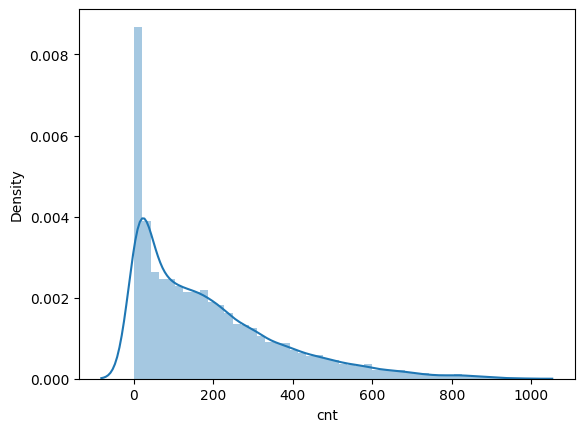

In [5]:
sns.distplot(df['cnt'])

Berdasarkan plot distribusi jumlah sewa sepeda di atas, terlihat bahwa distribusi nya right-skewed (positive skewness) pada label 'cnt'.

**Hubungan dengan categorical features**

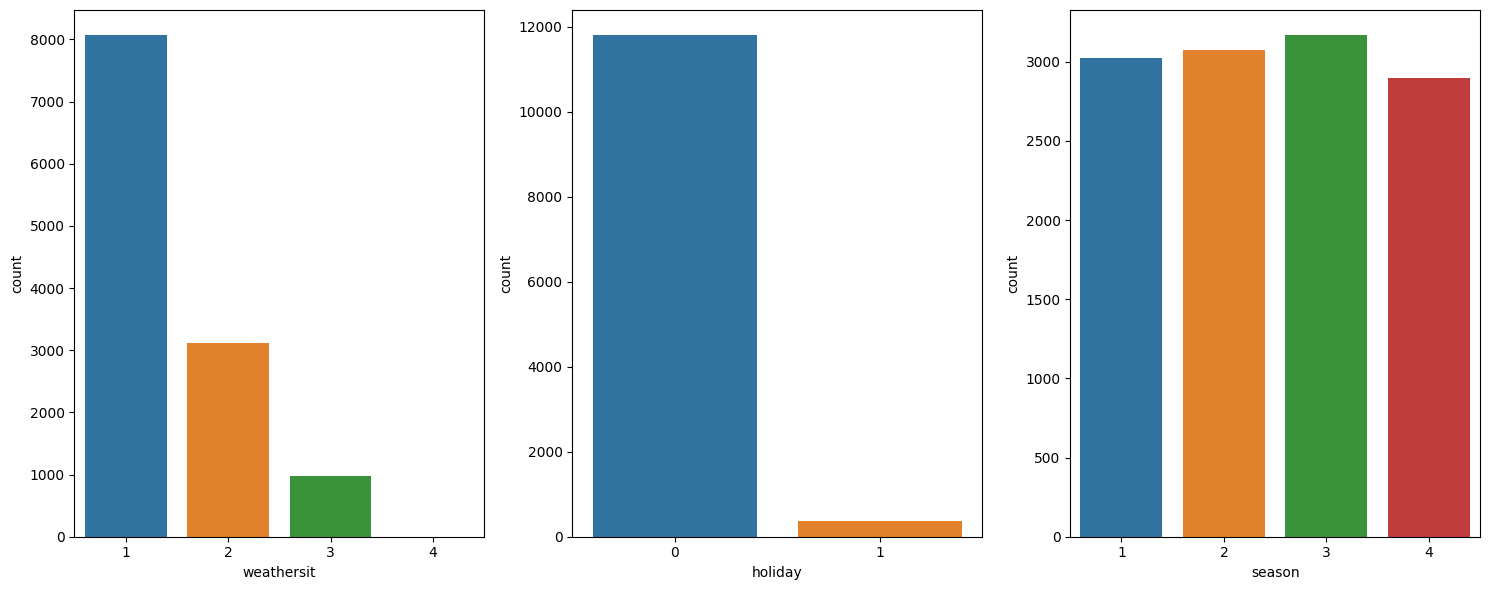

In [6]:
fig, axes = plt.subplots(1,3, figsize=(15,6))
sns.countplot(data=df, x='weathersit', ax=axes[0])
sns.countplot(data=df, x='holiday', ax=axes[1])
sns.countplot(data=df, x='season', ax=axes[2])
axes[0].set_xlabel('weathersit')
axes[1].set_xlabel('holiday')
axes[2].set_xlabel('season')
plt.tight_layout()
plt.show();

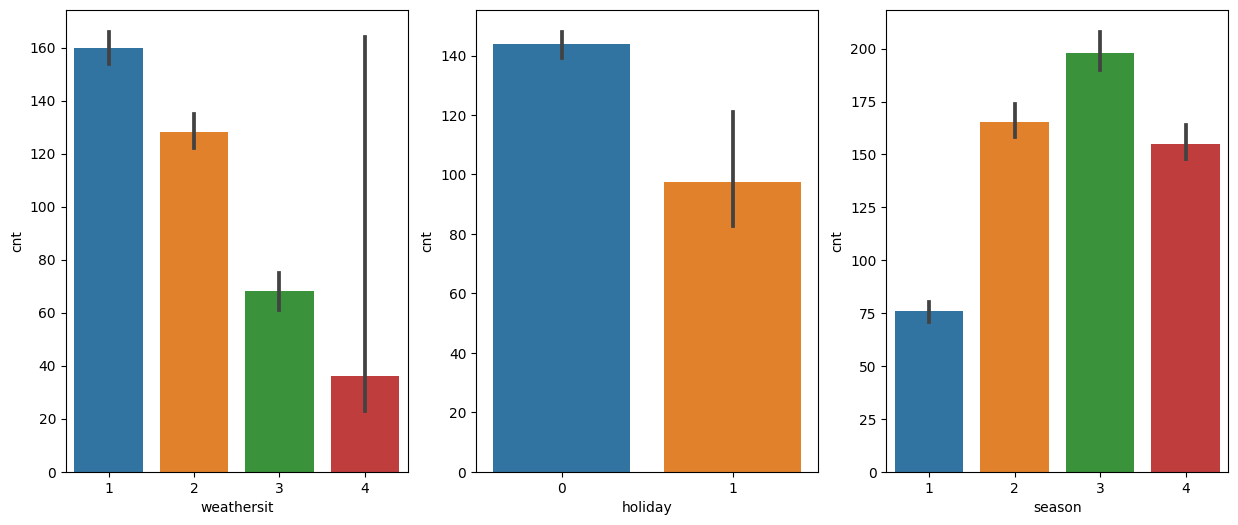

In [7]:
fig, axes = plt.subplots(1,3, figsize=(15,6))
sns.barplot(data=df, x='weathersit', y='cnt', estimator='median', ax=axes[0])
sns.barplot(data=df, x='holiday', y='cnt', estimator='median', ax=axes[1])
sns.barplot(data=df, x='season', y='cnt', estimator='median', ax=axes[2])
axes[0].set_xlabel('weathersit')
axes[1].set_xlabel('holiday')
axes[2].set_xlabel('season')
plt.show();

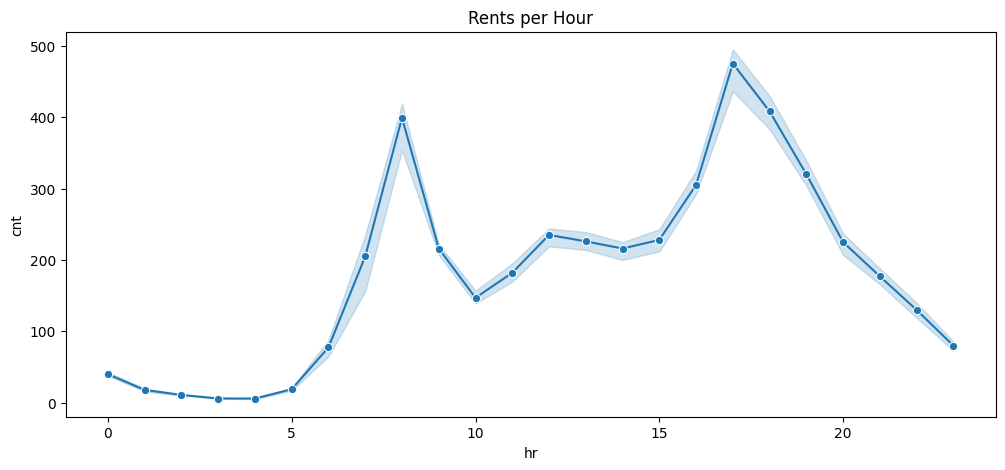

In [8]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x='hr', y='cnt', marker='o', estimator=np.median)
plt.title('Rents per Hour')
plt.show()

**Distribusi dari Numerical features**

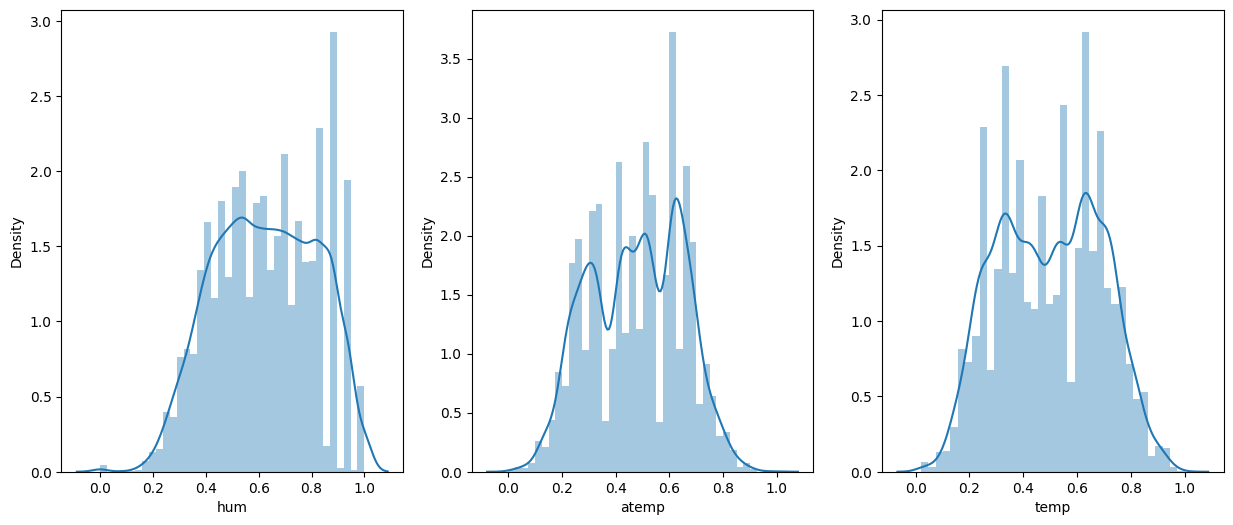

In [9]:
fig, axes = plt.subplots(1,3, figsize=(15,6))
sns.distplot(df['hum'], ax=axes[0])
sns.distplot(df['atemp'], ax=axes[1])
sns.distplot(df['temp'], ax=axes[2])
axes[0].set_xlabel('hum')
axes[1].set_xlabel('atemp')
axes[2].set_xlabel('temp');

**Hubungan dengan numerical features**

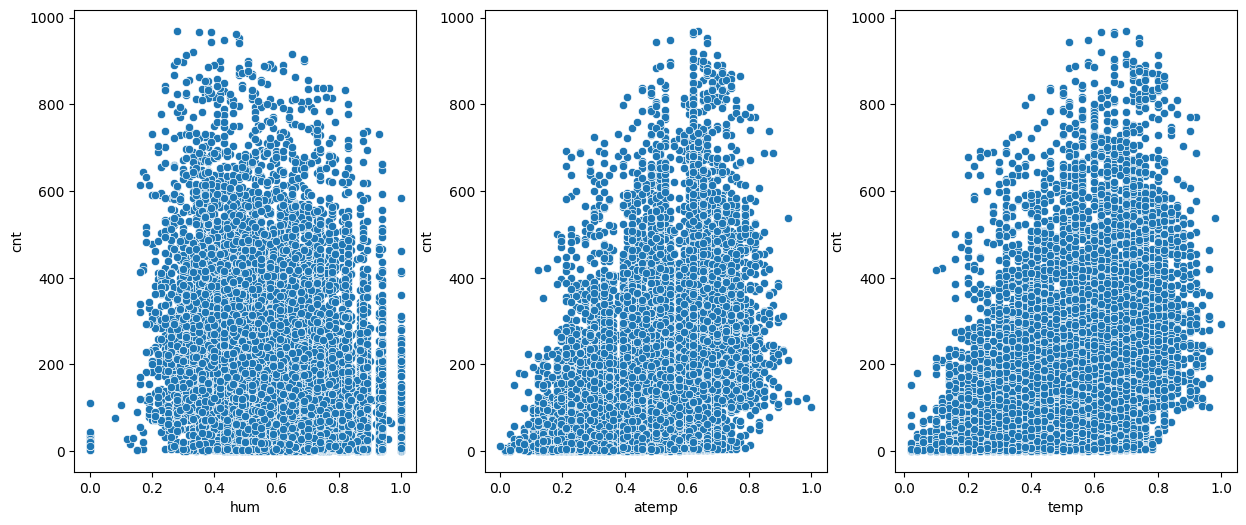

In [10]:
fig, axes = plt.subplots(1,3, figsize=(15,6))
sns.scatterplot(data=df, x='hum', y='cnt', ax=axes[0])
sns.scatterplot(data=df, x='atemp', y='cnt', ax=axes[1])
sns.scatterplot(data=df, x='temp', y='cnt', ax=axes[2])
axes[0].set_xlabel('hum')
axes[1].set_xlabel('atemp')
axes[2].set_xlabel('temp');

<AxesSubplot: >

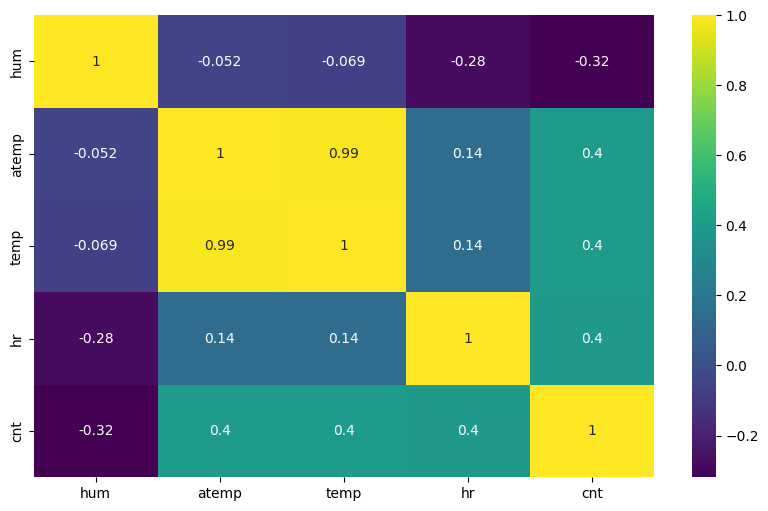

In [11]:
# melihat korelasi antar fitur numerik
num_features = ['hum','atemp', 'temp', 'hr', 'cnt']
corr = df[num_features].corr()
plt.figure(figsize=(10,6))
sns.heatmap(data=corr, annot=True, cmap='viridis')

### **Data Preprocessing**

Pada tahan ini, kita akan melakukan cleaning data yang nantinya ketika data sudah bersih akan digunakan untuk proses analisis selanjutnya. Beberapa tahap yang dilakukan yaitu :
- Menghapus data duplikat
- Mengubah tipe data yang belum sesuai
- Melakukan ekstraksi fitur tanggal
- Drop fitur yang tidak diperlukan/tidak relevan terhadap permasalahan dan goals.
- Melakukan treatment terhadap missing value dan outliers.

In [12]:
# membuat duplikasi dataframe
df_model = df.copy()

**Menghapus Data Duplikat**

In [13]:
# Cek data duplikat
df_model.duplicated().sum()

0

Ternyata tidak ditemukan data duplikat.

**Mengubah Tipe Data yang Belum Sesuai**

In [14]:
# melihat info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


Fitur dteday masih bertipe object. Fitur 'weathersit', 'holiday' & 'season' masih bertipe numerik.

In [15]:
# mengubah tipe fitur 'dteday' menjadi datetime
df_model['dteday'] = pd.to_datetime(df_model['dteday'])

In [16]:
df_model = df_model.astype({'weathersit':'category', 'holiday':'category', 'season':'category'})

**Melakukan Ekstraksi Fitur Tanggal (dteday)**

In [17]:
# melakukan ekstraksi fitur 'dteday'
df_model['year'] = df_model['dteday'].dt.year
df_model['month'] = df_model['dteday'].dt.month
df_model['day'] = df_model['dteday'].dt.day_of_week

In [18]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,dteday,datetime64[ns],0,0.0,731,"[2011-05-17T00:00:00.000000000, 2012-12-11T00:..."
1,hum,float64,0,0.0,89,"[0.81, 0.71]"
2,weathersit,category,0,0.0,4,"[3, 1]"
3,holiday,category,0,0.0,2,"[0, 1]"
4,season,category,0,0.0,4,"[3, 2]"
5,atemp,float64,0,0.0,65,"[0.8182, 0.4091]"
6,temp,float64,0,0.0,50,"[0.54, 0.08]"
7,hr,int64,0,0.0,24,"[2, 7]"
8,casual,int64,0,0.0,305,"[12, 248]"
9,registered,int64,0,0.0,742,"[679, 416]"


**Drop Fitur**

Selanjutnya dilakukan drop fitur pada 'dteday' (karena sudah diektraksi), 'atemp' (korelasi kuat dengan fitur 'temp'), 'casual' & 'registered' (sudah terwakilkan oleh 'cnt')

In [19]:
df_model = df_model.drop(['dteday', 'atemp','casual','registered'], axis=1)

**Rename columns**

In [20]:
df_model.rename(columns=
                {'hum': 'humidity', 
                 'weathersit': 'weather', 
                 'cnt': 'count'}, inplace=True)

In [21]:
# mengecek kembali dataset
df_model.head()

,humidity,weather,holiday,season,temp,hr,count,year,month,day
0,0.62,1,0,4,0.36,16,250,2011,12,4
1,0.64,1,0,2,0.54,4,18,2012,6,6
2,0.53,1,0,2,0.62,23,107,2011,6,2
3,0.87,2,0,2,0.36,8,145,2012,3,5
4,0.55,1,0,3,0.76,18,857,2012,7,1


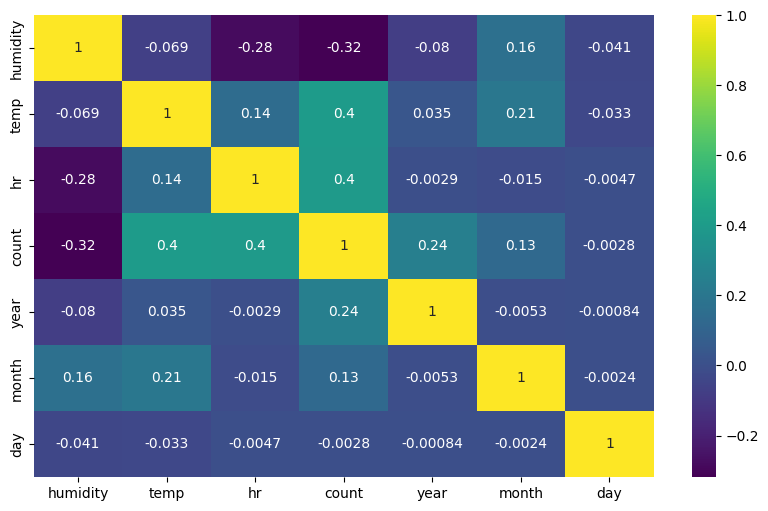

In [22]:
# membuat correlation matrix
corr = df_model.corr()
plt.figure(figsize=(10,6))
sns.heatmap(data=corr, annot=True, cmap='viridis')
plt.show()

Correlation matrix di atas menunjukkan korelasi antar fitur numerik. Pada fitur 'count' yang merupakan target dalam projek ini memiliki korelasi terkuat dengan fitur 'temp' dan 'hr' sebesar 0.4 (positif). Hal ini berarti bahwa semakin tinggi fitur 'temp' atau 'hr' maka semakin tinggi jumlah sewa/rental sepeda.

**Mengecek Missing Value**

In [23]:
df_model.isnull().sum()

humidity    0
weather     0
holiday     0
season      0
temp        0
hr          0
count       0
year        0
month       0
day         0
dtype: int64

Dataset sudah bersih dari missing value.

**Outliers Detection**

Banyaknya outliers pada dataset dapat mengganggu hasil prediksi dan modeling yang dilakukan. Berikutnya akan dilakukan treatment terhadap outliers berdasarkan informasi dari metode IQR dan domain knowledge.

<AxesSubplot: >

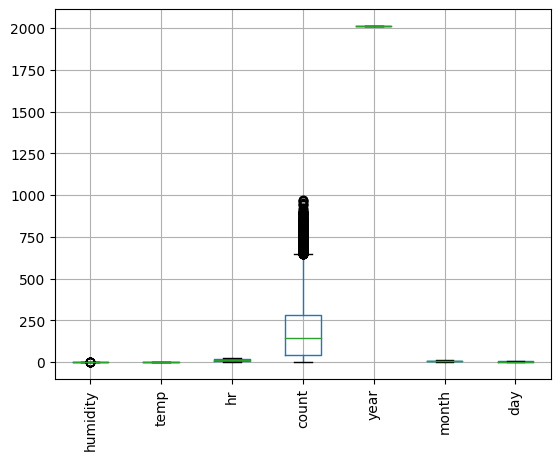

In [24]:
df_model.boxplot(rot=90)

Dari boxplot di atas, terlihat jelas beberapa outliers pada fitur 'count'. Selanjutnya perlu dilakukan pengecekan terhadap outliers.

In [25]:
# Membuat fungsi untuk mengecek outliers
def find_outlier(field):
    q1_field = field.describe()['25%']
    q3_field = field.describe()['75%']
    iqr_field = q3_field - q1_field
    UpFence = q3_field + 1.5 * iqr_field
    LowFence = q1_field - 1.5* iqr_field
    print(f'IQR : {iqr_field}')
    print(f'Limit Atas : {UpFence}')
    print(f'Limit Bawah : {LowFence}')

In [26]:
# outliers fitur humidity
find_outlier(df_model['humidity'])

IQR : 0.31000000000000005
Limit Atas : 1.245
Limit Bawah : 0.004999999999999893


In [27]:
# outliers fitur temp
find_outlier(df_model['temp'])

IQR : 0.32
Limit Atas : 1.1400000000000001
Limit Bawah : -0.13999999999999996


In [28]:
# outliers label count
find_outlier(df_model['count'])

IQR : 242.0
Limit Atas : 645.0
Limit Bawah : -323.0


Berikutnya akan dilakukan penghapusan outlier berdasarkan informasi dari metode IQR dan mempertimbangkan domain knowledge.

**humidity**

In [29]:
# Cek deskriptif statistik kolom humidity
df_model['humidity'].describe()

count    12165.000000
mean         0.625451
std          0.192102
min          0.000000
25%          0.470000
50%          0.620000
75%          0.780000
max          1.000000
Name: humidity, dtype: float64

Terlihat dari nilai minimum humidity kurang dari limit bawah, maka perlu dilakukan treatment terhadap outliers.

In [30]:
# cek humidity < 0.004999999999999893
df_model[df_model['humidity'] < 0.004999999999999893].count()['humidity']

14

Terdapat 14 data outliers berdasarkan fitur 'humidity'. Jumlah ini relatif kecil sehingga akan dilakukan penghapusan terhadap outliers ini.

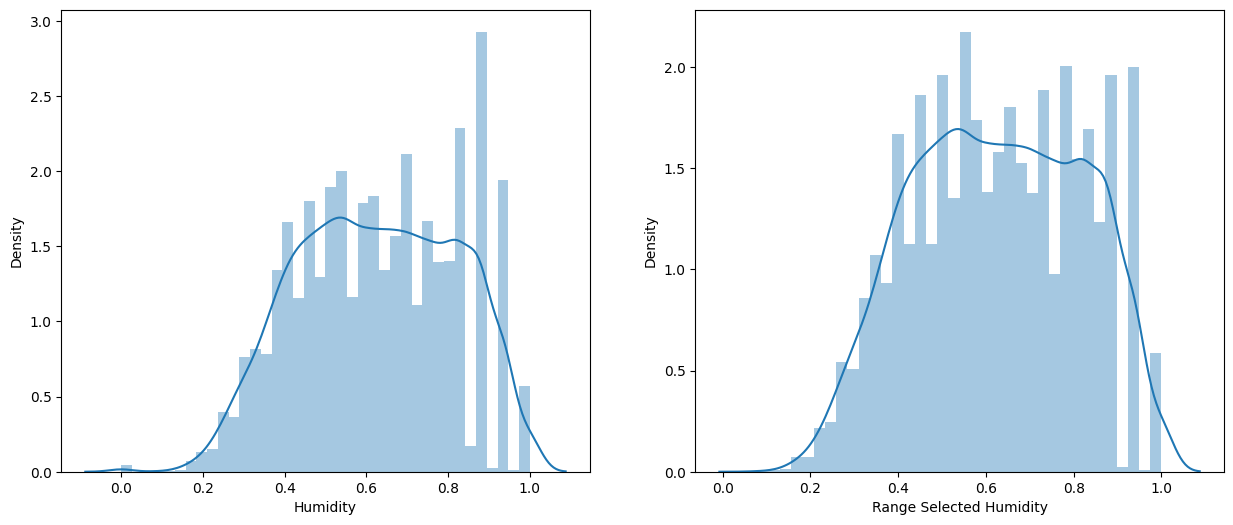

In [31]:
# melakukan filtering outliers pada fitur humidity
df_model = df_model[df_model['humidity'] >= 0.004999999999999893]

# plot distribusi sebelem dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(15,6))
sns.distplot(df['hum'], ax=axes[0])
sns.distplot(df_model['humidity'], ax=axes[1])
axes[0].set_xlabel('Humidity')
axes[1].set_xlabel('Range Selected Humidity');


**temp**

In [32]:
# Cek deskriptif statistik kolom temp
df_model['temp'].describe()

count    12151.000000
mean         0.498313
std          0.192562
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: temp, dtype: float64

Terlihat bahwa untuk nilai minimum dan maksimum masih di dalam limit bawah dan limit atas.

**count**

In [33]:
# Cek deskriptif statistik kolom count
df_model['count'].describe()

count    12151.000000
mean       189.457329
std        181.242898
min          1.000000
25%         40.000000
50%        142.000000
75%        282.000000
max        970.000000
Name: count, dtype: float64

Terlihat bahwa untuk nilai maksimum lebih dari limit atas, maka perlu dilakukan treatment terhadap outliers. Untuk nilai minimum sudah baik karena sudah lebih dari nol (jumlah sewa tidak mungkin bernilai negatif).

In [34]:
# cek count > 645
df_model[df_model['count'] > 645].count()['count']

338

Terdapat 338 data outliers. Jumlah ini masih relatif kecil terhadap jumlah data semula (12.165), sehingga akan dilakukan penghapusan terhadap outliers ini.

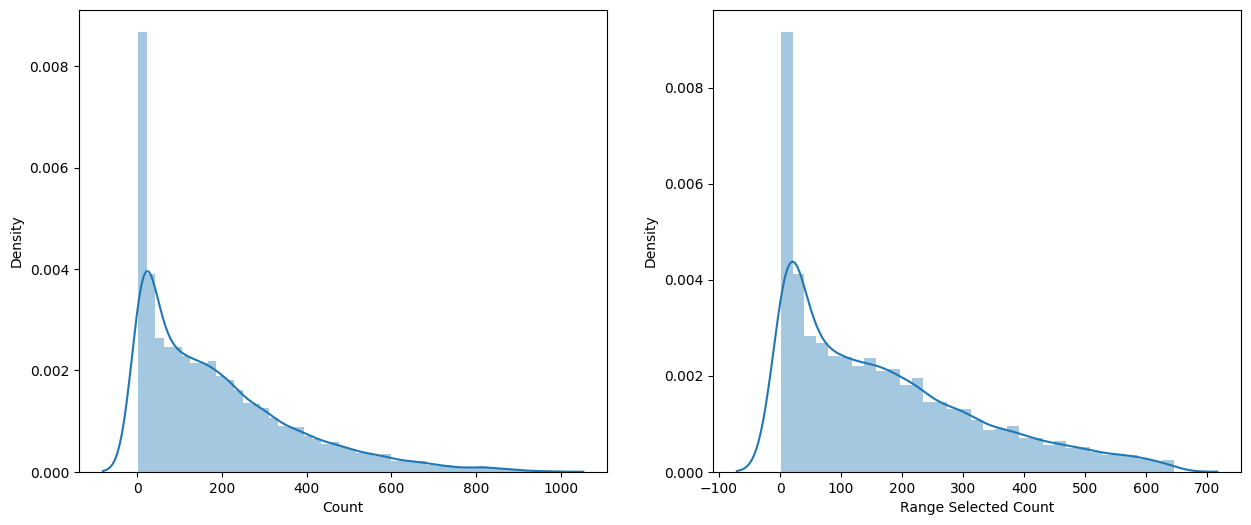

In [35]:
# melakukan filtering outliers pada label count
df_model = df_model[df_model['count'] <= 645]

# plot distribusi sebelem dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(15,6))
sns.distplot(df['cnt'], ax=axes[0])
sns.distplot(df_model['count'], ax=axes[1])
axes[0].set_xlabel('Count')
axes[1].set_xlabel('Range Selected Count');

**Clean Dataset**

In [36]:
# cek dataset yang sudah bersih
display(df_model.head(), df_model.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11813 entries, 0 to 12164
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   humidity  11813 non-null  float64 
 1   weather   11813 non-null  category
 2   holiday   11813 non-null  category
 3   season    11813 non-null  category
 4   temp      11813 non-null  float64 
 5   hr        11813 non-null  int64   
 6   count     11813 non-null  int64   
 7   year      11813 non-null  int64   
 8   month     11813 non-null  int64   
 9   day       11813 non-null  int64   
dtypes: category(3), float64(2), int64(5)
memory usage: 773.4 KB


,humidity,weather,holiday,season,temp,hr,count,year,month,day
0,0.62,1,0,4,0.36,16,250,2011,12,4
1,0.64,1,0,2,0.54,4,18,2012,6,6
2,0.53,1,0,2,0.62,23,107,2011,6,2
3,0.87,2,0,2,0.36,8,145,2012,3,5
5,0.72,1,0,4,0.46,0,45,2012,10,0


None

Tersisa 11813 baris data yang akan digunakan selanjutnya dalam pemodelan. Ini berarti hanya sekitar 2,9% data yang telah dihapus di proses treatment outliers.

## Modeling

### Encoding

Untuk dapat masuk ke pemodelan, fitur kategorikal diubah terlebih dahulu menjadi numerik dengan melakukan Encoding sebagai berikut.

In [37]:
# import library yang diperlukan
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

One Hot Encoding dilakukan untuk fitur 'season', 'weather', dan 'holiday'. Hal ini karena unique item dari fitur ini tidak terlalu banyak dan fitur ini bersifat nominal.

Binary Encoding dilakukan untuk fitur 'day' karena unique item dari fitur 'day' cukup banyak (7) dan bersifat nominal.

In [38]:
# Mengubah fitur kategorikal menjadi numerikal
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['weather', 'holiday', 'season']),
    ('Binary', ce.BinaryEncoder(), ['day'])
], remainder='passthrough')

### Data Splitting

In [39]:
# Memisahkan data independen variabel dengan target
X = df_model.drop('count', axis=1)
y = df_model['count']

### Train and Test Data Splitting

In [40]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

In [41]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19)

### Model Evaluation : Benchmark

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [43]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
svr = SVR()
dt = DecisionTreeRegressor(random_state=19)
rf = RandomForestRegressor(random_state=19)
ada = AdaBoostRegressor(random_state=19)
xgb = XGBRegressor(random_state=19)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_svr = TransformedTargetRegressor(svr, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_ada = TransformedTargetRegressor(ada, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_svr, log_dt, log_rf, log_ada, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=19)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-146.89477881 -147.73506511 -141.58486378 -144.2378025  -146.32634157] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[ -98.11999059 -101.80575819  -94.8408329   -99.2764279   -99.25142982] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1.42796813 -1.33781052 -1.44667283 -1.39736189 -1.35482811] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-98.69073666 -99.03826039 -93.41064386 -97.54488717 -99.48146283] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-62.24439323 -63.34753395 -60.4949168  -60.99948984 -62.92117847] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegress

In [44]:
# evaluasi seluruh kandidat model
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'SVR', 'DecisionTree Regressor', 'RandomForest Regressor', 'AdaBoost Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-145.355770,2.210936,-98.658888,2.258460,-1.392928,0.041534
1,KNN Regressor,-97.633198,2.206646,-62.001502,1.094571,-0.861652,0.036406
2,SVR,-100.960421,1.658667,-62.519147,0.576175,-1.056182,0.046025
3,DecisionTree Regressor,-63.753374,3.129188,-38.046954,1.065916,-0.427724,0.032638
4,RandomForest Regressor,-45.983698,2.196583,-27.745722,0.889400,-0.292270,0.010619
5,AdaBoost Regressor,-130.242620,4.100479,-81.464780,2.919458,-0.546658,0.011810
6,XGBoost Regressor,-41.400547,1.173395,-25.512938,0.615984,-0.262384,0.006377


Berdasarkan nilai RMSE, MAE, dan MAPE, model **XGBoost** adalah model yang terbaik karena menghasilkan nilai residual/error yang paling rendah. Kemudian jika dilihat nilai RMSE bernilai 1,6 kali dari nilai MAE. Hal ini disebabkan karena pada perhitungan RMSE, nilai residual/error akan dikuadratkan terlebih dahulu sebelum dirata-ratakan dan diakar. Hal ini akan menyebabkan jika terdapat residual/error yang besar, akan memberikan bobot nilai error yang lebih tinggi. Di semua model, terdapat perbedaan signifikan antara nilai RMSE dan MAE yang berarti bahwa terdapat nilai-nilai error yang cukup besar di semua model. Selanjutnya akan dilakukan prediksi dengan menggunakan model XGBoost.

**Penjelasan Model XGboost**

XGBoost merupakan model ensemble yang dikembangkan dari model Gradient Boosting, sehingga pada dasarnya memiliki algoritma yang sama dengan Gradient Boosting. Pengembangan utama pada XGBoost yaitu XGBoost memberikan penalti untuk kompleksitas model (L1 dan L2 regularization) serta memiliki komputasi yang lebih efisien dibanding Gradient Boosting.

Boosting merupakan metode secara iteratif untuk meningkatkan performa model dengan cara memprediksi residual/error dari model sebelumnya dan kemudian ditambahkan bersama ke dalam model berikutnya untuk membuat prediksi akhir. Pada model XGboost ini juga menggunakan algoritma Gradient Descent untuk meminimalisir residual/error (loss function) saat menambahkan model baru ke ensemble. Algoritma Gradient Descent akan mendorong model untuk fokus ke input yang menghasilkan residual/error yang tinggi. Jika model berikutnya berhasil menghasilkan residual/error yang rendah, maka loss/kerugiannya akan berkurang. Dengan cara iteratif seperti ini, maka akan diperoleh overall model ensemble akhir yang memiliki performa yang baik.

**Predict to Test Set with the Benchmark Model**

Prediksi pada Test Set menggunakan model XGBooost.

In [45]:
# benchmark model terbaik
models = {'XGB': XGBRegressor(random_state=19)}

score_rmse = []
score_mae = []
score_mape = []

# prediksi pada test set
for i in models:
    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'Model': models.keys(),
                                    'RMSE': score_rmse, 
                                    'MAE': score_mae, 
                                    'MAPE': score_mape
                                    })
score_before_tuning


,Model,RMSE,MAE,MAPE
0,XGB,40.474951,25.266642,0.409525


Hasil prediksi pada Test Set ternyata menghasilkan nilai yang cukup baik dan tidak mengalami perbedaan signifikan yang berarti bahwa model tidak mengalami overfitting.

**Hyperparameter Tuning**

Selanjutnya dilakukan hyperparameter tuning pada model XGBoost ini untuk dapat meningkatkan performa model. XGBoost memiliki beberapa hyperparameter umum yang dapat dilakukan tuning seperti : max_depth, learning_rate, n_estimators, subsample, colsample_bytree serta hyperparameter regularisasi seperti : alpha dan gamma.

Referensi panduan untuk XGBoost Hyperparameter Tuning : 

[Ref 1](https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663)

[Ref 2](https://machinelearningmastery.com/extreme-gradient-boosting-ensemble-in-python/)

In [46]:
# Kedalaman pohon
max_depth = list(np.arange(3, 11)) #semakin tinggi nilainya maka semakin kompleks dan meningkatkan kemungkinan overfitting

# Learning rate
learning_rate = list(np.arange(1, 51)/100) #semakin rendah nilainya maka dapat meningkatkan peluang mencapai nilai optimum yang lebih baik namun dengan waktu komputasi yang lebih lambat

# Jumlah pohon
n_estimators = list(np.arange(100, 251)) #ekuivalen dengan jumlah round dari boosting

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10) #semakin tinggi nilainya maka meningkatkan potensi overfitting

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(3, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-1, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [47]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=19, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=19)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah satu metric untuk optimisasi
    random_state = 19  
)

In [48]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=19, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['weather',
                                                                                'holiday',
                                                                                'season']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                     

In [49]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE, MAPE & R2
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
23,1.992451,0.049482,0.020464,0.002583,0.7,2.154435,175,7,0.13,4,...,0.218331,1,-0.437400,-0.436337,-0.508812,-0.449195,-0.416698,-0.449688,0.031348,1
19,3.040231,0.066019,0.030055,0.008502,0.5,0.1,188,9,0.12,1,...,0.460893,2,-0.516937,-0.470662,-0.609938,-0.557122,-0.510060,-0.532944,0.047268,2
36,2.120728,0.032349,0.021162,0.001468,0.5,0.464159,242,6,0.19,7,...,0.705753,3,-0.522225,-0.572052,-0.697919,-0.640003,-0.533832,-0.593206,0.066582,8
20,1.688101,0.041297,0.017626,0.001744,0.3,0.16681,198,6,0.15,7,...,0.394121,5,-0.546736,-0.512988,-0.678644,-0.636250,-0.516628,-0.578249,0.067071,7
35,1.039242,0.032111,0.016937,0.002540,0.9,0.1,103,7,0.33,8,...,0.281036,4,-0.472879,-0.502878,-0.626206,-0.564521,-0.528007,-0.538898,0.053017,5


In [50]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -40.69169905582728
Best_params: {'model__subsample': 0.7, 'model__reg_alpha': 2.1544346900318834, 'model__n_estimators': 175, 'model__max_depth': 7, 'model__learning_rate': 0.13, 'model__gamma': 4, 'model__colsample_bytree': 0.9}


**Predict to Test Set with the Tuned Model**

In [51]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=19)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE, MAPE, & R2 setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'Model': model.keys(),'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning})
score_after_tuning

,Model,RMSE,MAE,MAPE
0,XGB,38.982491,23.893879,0.344258


**Performance Comparison**

In [52]:
# sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning[score_before_tuning['Model']=='XGB'])

,Model,RMSE,MAE,MAPE
0,XGB,40.474951,25.266642,0.409525


In [53]:
# sesudah hyperparameter tuning
score_after_tuning

,Model,RMSE,MAE,MAPE
0,XGB,38.982491,23.893879,0.344258


Dari hasil di atas, terlihat bahwa setelah dilakukan hyperparameter tuning model mengalami peningkatan performa (turunnya nilai RMSE, MAE, dan MAPE).

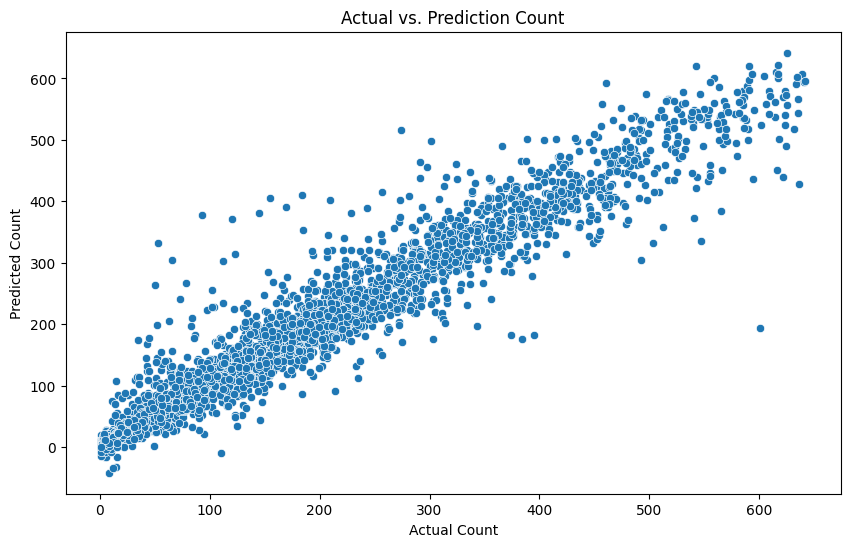

In [58]:
plt.figure(figsize=(10, 6))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Count', 
                                               xlabel='Actual Count', 
                                               ylabel='Predicted Count');

Berdasarkan plot di atas, secara overal hasil prediksi sudah cukup baik namun masih terdapat beberapa hasil prediksi yang sedikit menyimpang baik lebih tinggi (overestimation) atau lebih rendah (underestimation).

**Feature Importances**

Untuk menjelaskan fitur apa yang paling mempengaruhi target (count), kita dapat melihatnya melalui Feature Importances sebagai berikut.

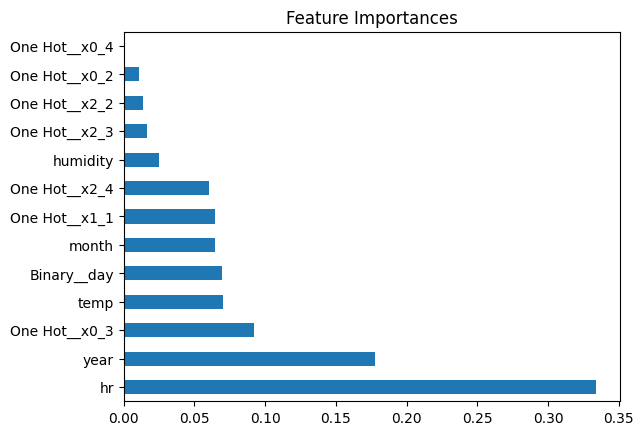

In [55]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False)
feature_imp.plot(kind='barh', title='Feature Importances');

Dari plot di atas terlihat, nilai Feature Importances untuk setiap fitur yang ada. Terlihat bahwa 5 besar fitur dengan Feature Importances tertinggi yaitu 'hr', 'year', 'One Hot__x0_3' (weather-3), 'temp', dan 'Binary__day'. Dari plot di atas terlihat bahwa fitur 'hr' sangat mempengaruhi target (count) karena memiliki nilai Feature Importances yang jauh lebih tinggi dibanding fitur lainnya. 

### **Conclusion**

Dari hasil Benchmark Model dan Hyperparameter Tuning yang dilakukan, diperoleh model XGBoost dengan performa terbaik dengan parameter terbaik sebagai berikut :
- sub_sample : 0.7
- reg_alpha : 2.1544346900318834
- n_estimators : 175
- max_depth : 7
- learning_rate : 0.13
- gamma : 4
- colsample_bytree : 0.9

Metrik evaluasi yang digunakan pada model ini adalah nilai RMSE, MAE & MAPE. Jika ditinjau dari nilai RMSE sebesar 38.98 (atau dibulatkan ke 39), maka ini berarti bahwa nilai prediksi untuk jumlah kebutuhan bike sharing akan berkisar kurang lebih 39 sepeda dari nilai prediksi dari model (dengan nilai maksimum yang dilatih dalam model yaitu 645). Namun tidak menutup kemungkinan juga bahwa prediksi bisa meleset lebih jauh karena masih terdapat beberapa data yang nilai prediksi dan aktualnya masih menghasilkan error yang lebih besar dari nilai RMSE.

Berdasarkan pemodelan yang telah dilakukan, fitur 'hr', 'year', 'One Hot__x0_3' (weather-3), 'temp', dan 'Binary__day' menjadi top 5 fitur yang paling berpengaruh terhadap 'count'.

### **Recommendations**

Model ini tentunya masih dapat ditingkatkan performanya agar dapat menghasilkan prediksi yang lebih baik. Berikut beberapa rekomendasi yang dapat dilakukan untuk mengembangkan model agar lebih baik yaitu:
1. Penambahan fitur yang korelatif terhadap target ('count'), seperti lokasi station (berkaitan dengan kemudahan akses dari station). Tiap station pastinya memiliki demand yang berbeda-beda, sehingga jika terdapat fitur ini akan meningkatkan kualitas prediksi dari model.
2. Penambahan data. Adanya penambahan data dapat membuat model bisa memperkaya pola-pola untuk dilatih.
3. Model yang sudah dibangun ini juga dapat dimanfaatkan untuk pengembangan model dan kebutuhan lainnya, seperti pembuatan model untuk memprediksi demand bike sharing di tiap station dengan mempertimbangkan karakteristik tiap station. Selain itu, prediksi dari model ini juga dapat memperkirakan kapan waktu terbaik untuk melakukan maintenance pada sepeda (ketika demand sedang tidak tinggi).

**Save Model**

In [67]:
# Save model
import pickle

final_model = random_xgb.best_estimator_.fit(X_train, y_train)

pickle.dump(final_model, open('bike_sharing_xgb_model.sav', 'wb'))

In [68]:
# Load model
filename = 'bike_sharing_xgb_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [70]:
# hasil RMSE pada Test Set menggunakan model yang telah disimpan
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

38.982490637232054